# Assignment #8


In [2]:
#First, we install and import the libraries

!pip install chardet
!pip install geopandas

import chardet
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString

     ---------------------------------------- 1.1/1.1 MB 3.3 MB/s eta 0:00:00
     --------------------------------------- 22.9/22.9 MB 16.8 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 15.0 MB/s eta 0:00:00


In [4]:
!pip install folium
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt
import geopandas as gpd

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


     ---------------------------------------- 97.0/97.0 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 133.2/133.2 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


1. Import data from the online source

In [5]:
# Gettting the character format (encoding type)

base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [6]:
# Step 1: We get the encoding and format type of the characters that compose the dataset
directory = r'../../_data/data_dengue_peru.csv' #Definition of the directory
with open(directory, 'rb') as file: #Opening the file in binary mode
    content_file = file.read()

characters = chardet.detect(content_file) #Use Chardet to detect the coding
encoding = characters['encoding']

# Data importation
df_dengue = pd.read_csv(directory, encoding=encoding, dtype={'Ubigeo': 'str'}, low_memory=False) #read csv, parameters specified

df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. 

In [7]:
df_dengue['UBIPROV'] = df_dengue['Ubigeo'].astype(str).str[0:4]
df_dengue['UBIDPTO'] = df_dengue['Ubigeo'].astype(str).str[0:2]

df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,UBIPROV,UBIDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,0809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0,0809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,0809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17


In [8]:
# Object or srting to int
df_dengue['Ubigeo'] = df_dengue['Ubigeo'].astype(str).astype(int)

3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use the provided shapefile.


In [9]:
# Upload shape file at district level

maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [10]:
maps

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [11]:
#Check unique values
maps['CODIGO'].is_unique

True

In [12]:
maps['CODIGO'].unique().size

1874

In [13]:
# Select only relevant columns
maps = maps[['CODIGO', 'geometry']]
maps = maps.rename({'CODIGO':'UBIGEO'}, axis =1 )
maps

,UBIGEO,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [14]:
maps.rename(columns={'UBIGEO': 'Ubigeo'}, inplace=True)
maps

,Ubigeo,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [15]:
# Object or srting to int
maps['Ubigeo'] = maps['Ubigeo'].astype(str).astype(int)

In [16]:
# Merge using inner way to drop missing values 
dataset_dengue = pd.merge(maps, df_dengue, how="inner", on="Ubigeo")
dataset_dengue

,Ubigeo,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIPROV,UBIDPTO
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,19,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,1401,14
1,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,1401,14
2,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,1401,14
3,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,23,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,1401,14
4,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2019,24,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,1401,14
...,...,...,...,...,...,...,...,...,...,...,...
172139,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019,49,Dengue,JUNIN,MAZAMARI,SATIPO,0,1206,12
172140,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019,50,Dengue,JUNIN,MAZAMARI,SATIPO,0,1206,12
172141,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019,51,Dengue,JUNIN,MAZAMARI,SATIPO,0,1206,12
172142,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019,52,Dengue,JUNIN,MAZAMARI,SATIPO,0,1206,12


In [42]:
# Function to filter dataset_covid by year, month and administrative space(province)

#def subdata( a , b, c ):
    
#    if c == "All-Peru":
        
#        resultado = dataset_dengue.loc[(dataset_dengue['Año']== a) & (dataset_dengue['Semana']== b)]
#    else:
#        resultado = dataset_dengue.loc[(dataset_dengue['Año']== a) & (dataset_dengue['Semana']== b) & (dataset_dengue['Provincia']== c)]
#    return resultado  

In [17]:
def subdata(a, c):
    if c == "All-Peru":
        # Filter only by year if c is "All-Peru".
        resultado = dataset_dengue.loc[dataset_dengue['Año'] == a]
    else:
        # Filter by year and province if c is not "All-Peru".
        resultado = dataset_dengue.loc[(dataset_dengue['Año'] == a) & (dataset_dengue['Provincia'] == c)]
    return resultado

In [18]:
# Step 1: Filtering data for the year 2021
dengue_2021 = subdata(2021, 'All-Peru')  # Set 'All-Peru' according to the 'subdata' function.

In [19]:
dengue_2021

,Ubigeo,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIPROV,UBIDPTO
20,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,1,1401,14
21,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0,1401,14
22,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,41,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,1401,14
23,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,42,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,1401,14
24,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,43,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,1401,14
...,...,...,...,...,...,...,...,...,...,...,...
172033,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,15,Dengue,JUNIN,MAZAMARI,SATIPO,6,1206,12
172034,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,16,Dengue,JUNIN,MAZAMARI,SATIPO,6,1206,12
172035,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,20,Dengue,JUNIN,MAZAMARI,SATIPO,7,1206,12
172036,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,21,Dengue,JUNIN,MAZAMARI,SATIPO,5,1206,12


In [20]:
print(dengue_2021['Casos'].dtype)

object


In [21]:
# Convierte la columna 'datos' a numérico, forzando los no convertibles a NaN
dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'], errors='coerce')

C:\Users\DDelgado\anaconda3\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [22]:
dengue_2021

,Ubigeo,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Casos,UBIPROV,UBIDPTO
20,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,20,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,1.0,1401,14
21,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,21,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,0.0,1401,14
22,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,41,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,1401,14
23,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,42,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,1401,14
24,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",2021,43,Dengue,LAMBAYEQUE,LA VICTORIA,CHICLAYO,NaN,1401,14
...,...,...,...,...,...,...,...,...,...,...,...
172033,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,15,Dengue,JUNIN,MAZAMARI,SATIPO,6.0,1206,12
172034,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,16,Dengue,JUNIN,MAZAMARI,SATIPO,6.0,1206,12
172035,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,20,Dengue,JUNIN,MAZAMARI,SATIPO,7.0,1206,12
172036,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2021,21,Dengue,JUNIN,MAZAMARI,SATIPO,5.0,1206,12


<AxesSubplot:>

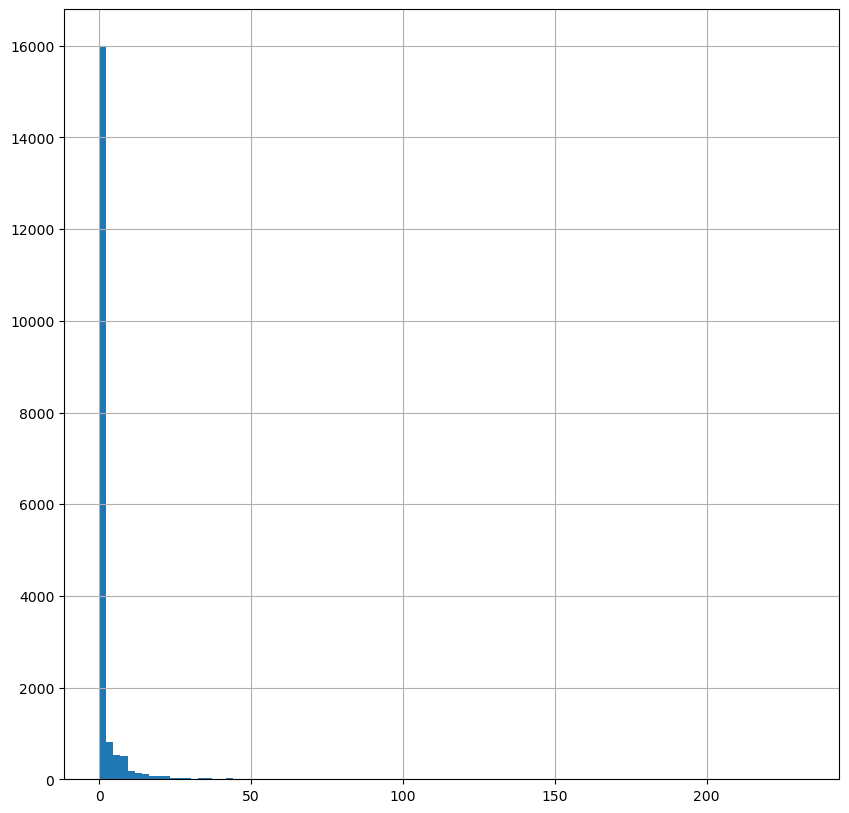

In [23]:
# First always check the distribution|
fig, ax = plt.subplots(figsize=(10, 10))
dengue_2021["Casos"].hist(bins = 100)

#check the distribution of the variables BEFORE PLOTTING

<AxesSubplot:>

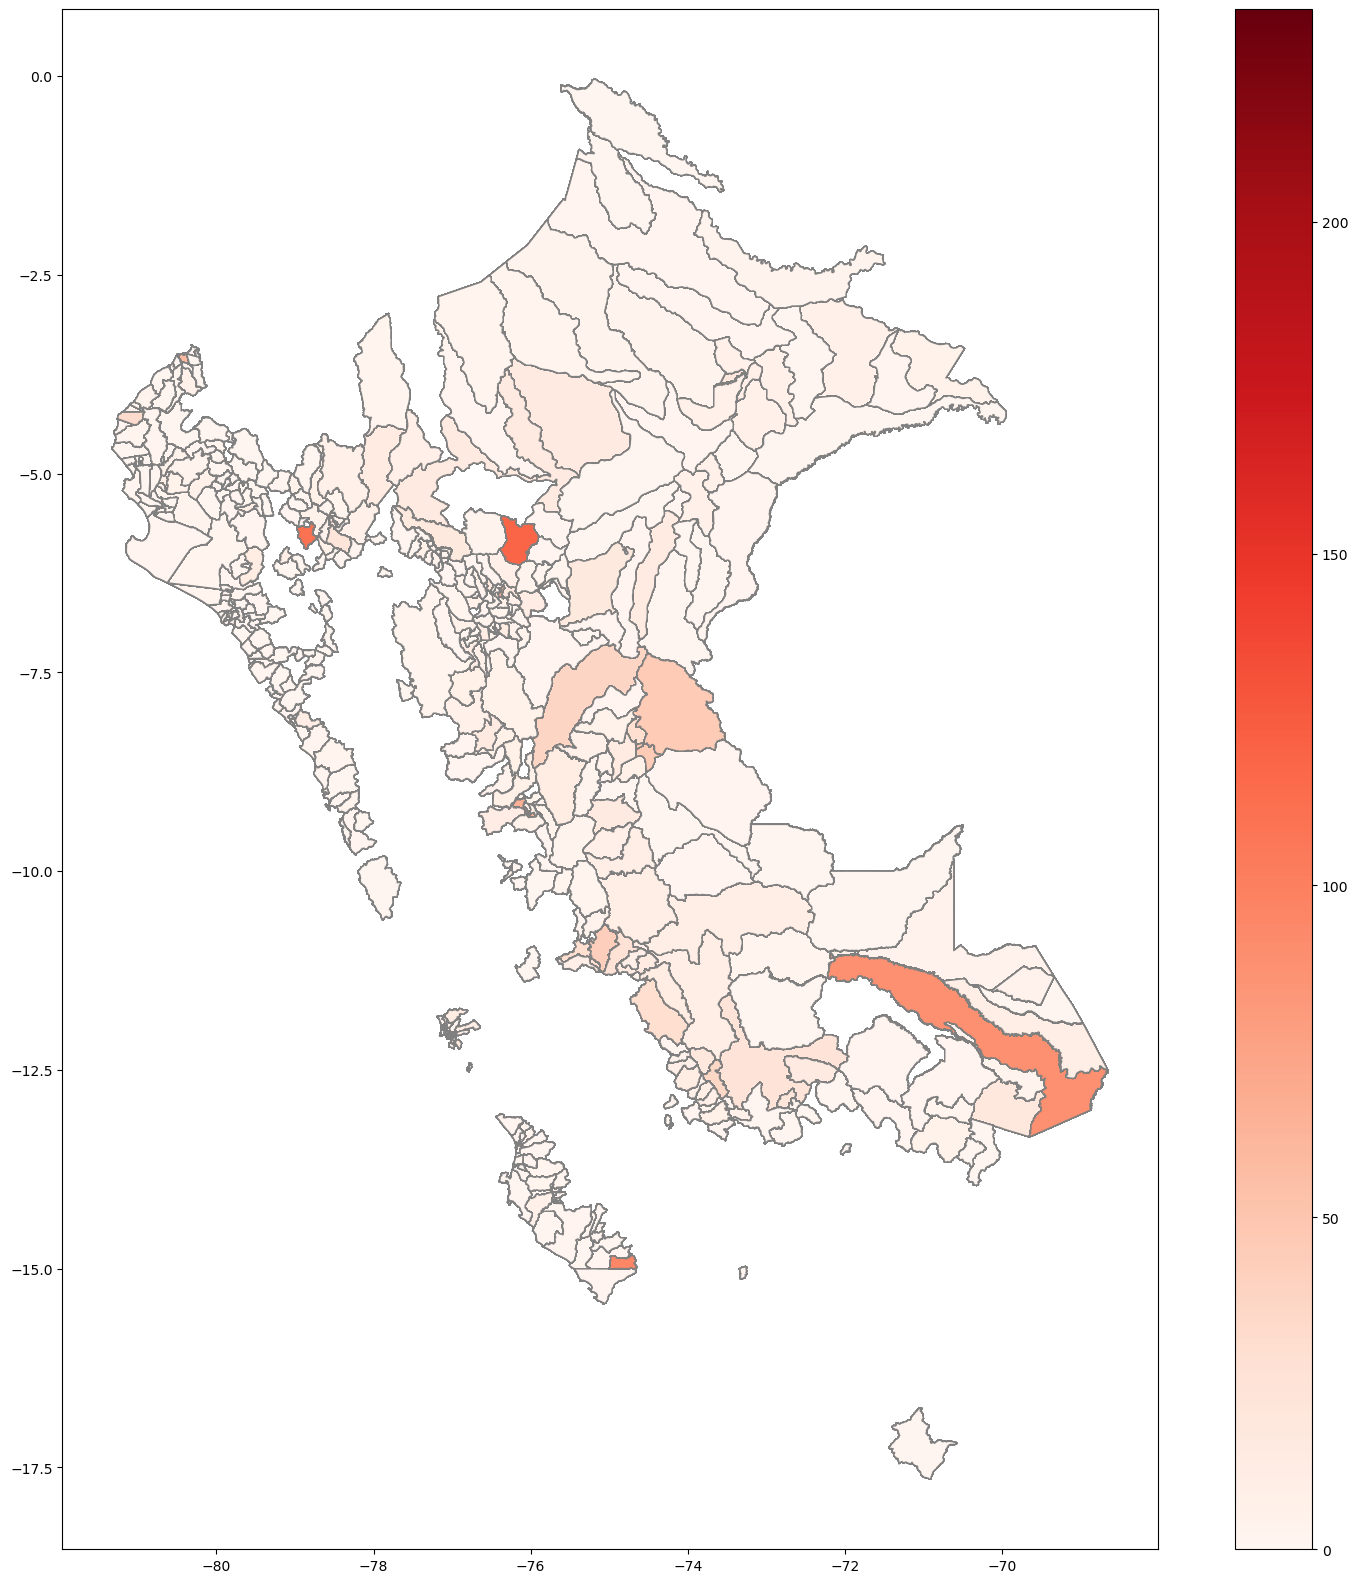

In [24]:
dengue_2021.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use the provided shapefile. For this task, you will have to aggregate shapefiles at the province level.


In [40]:
maps_dep = gpd.read_file(r'../../_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp') 
maps_dep

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."
2,3,3.0,03,APURIMAC,ABANCAY,1.765933,7.730154,2,7.730154,1.765933,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-73.74655 -13.17442, -73.74570 -13.1..."
3,4,4.0,04,AREQUIPA,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5,5.0,05,AYACUCHO,AYACUCHO,3.643705,17.127166,4,17.127166,3.643705,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."
5,6,6.0,06,CAJAMARCA,CAJAMARCA,2.684527,12.397424,5,12.397424,2.684527,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-78.22182 -7.76346, -78.22233 -7.763..."
6,7,7.0,07,CALLAO,CALLAO,0.011738,1.111221,6,1.111221,0.011738,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.13504 -11.81820, -77.13484 -11.8..."
7,8,8.0,08,CUSCO,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2..."
8,9,9.0,09,HUANCAVELICA,HUANCAVELICA,1.839851,9.561245,8,9.561245,1.839851,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9..."
9,10,10.0,10,HUANUCO,HUANUCO,3.089811,14.589840,9,14.589840,3.089811,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-75.99200 -8.32108, -75.99015 -8.321..."


In [41]:
#Check unique values
maps_dep['CCDD'].is_unique

True

In [42]:
#Check how many unique values
maps_dep['CCDD'].unique().size

25

In [43]:
# Select only relevant columns
maps_dep = maps_dep[['CCDD', 'geometry']]
maps_dep = maps_dep.rename({'CCDD':'UBIDPTO'}, axis =1 )
maps_dep

,UBIDPTO,geometry
0,01,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,02,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."
2,03,"POLYGON ((-73.74655 -13.17442, -73.74570 -13.1..."
3,04,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,05,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."
5,06,"POLYGON ((-78.22182 -7.76346, -78.22233 -7.763..."
6,07,"POLYGON ((-77.13504 -11.81820, -77.13484 -11.8..."
7,08,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2..."
8,09,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9..."
9,10,"POLYGON ((-75.99200 -8.32108, -75.99015 -8.321..."


In [44]:
# Now we generate a dataset of aggregated cases of 2021 by Departamento
dengue_2021_dep = dengue_2021[['UBIDPTO','Año','Casos']]

dengue_2021_dep = dengue_2021_dep.groupby('UBIDPTO')['Casos'].sum().reset_index()
dengue_2021_dep

,UBIDPTO,Casos
0,01,1830.0
1,02,26.0
2,05,1346.0
3,06,2555.0
4,07,2.0
5,08,1341.0
6,10,2735.0
7,11,4577.0
8,12,3168.0
9,13,382.0


In [45]:
# Now we merge the data
dataset_dengue_2021_dep = pd.merge(maps_dep, dengue_2021_dep, how="inner", on="UBIDPTO")

<AxesSubplot:>

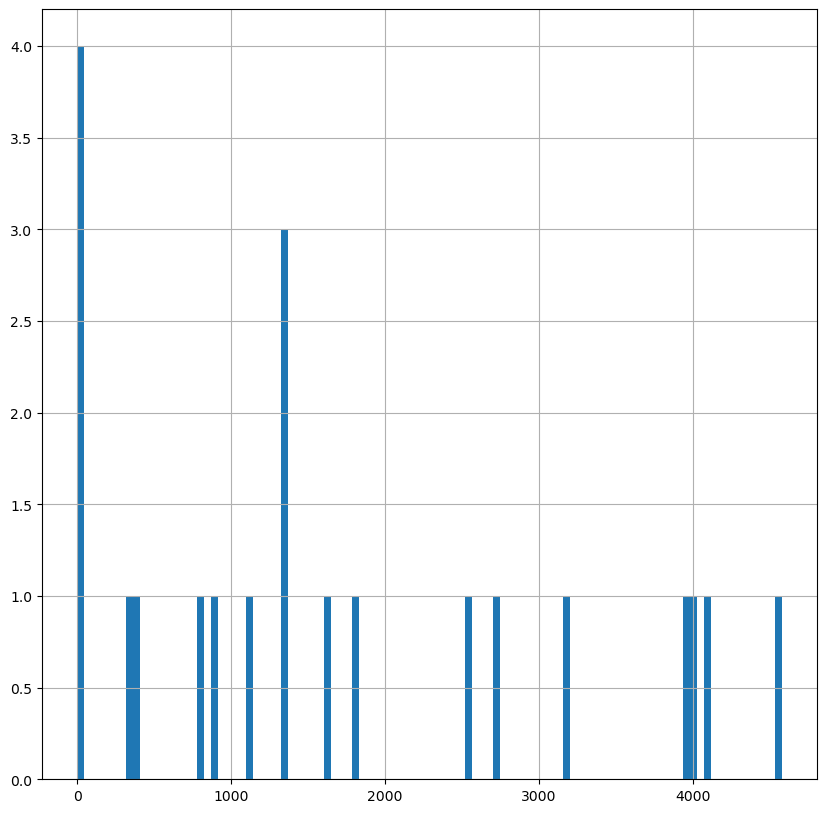

In [46]:
#Check distribution
fig, ax = plt.subplots(figsize=(10, 10))
dataset_dengue_2021_dep["Casos"].hist(bins = 100)

#check the distribution of the variables BEFORE PLOTTING

<AxesSubplot:>

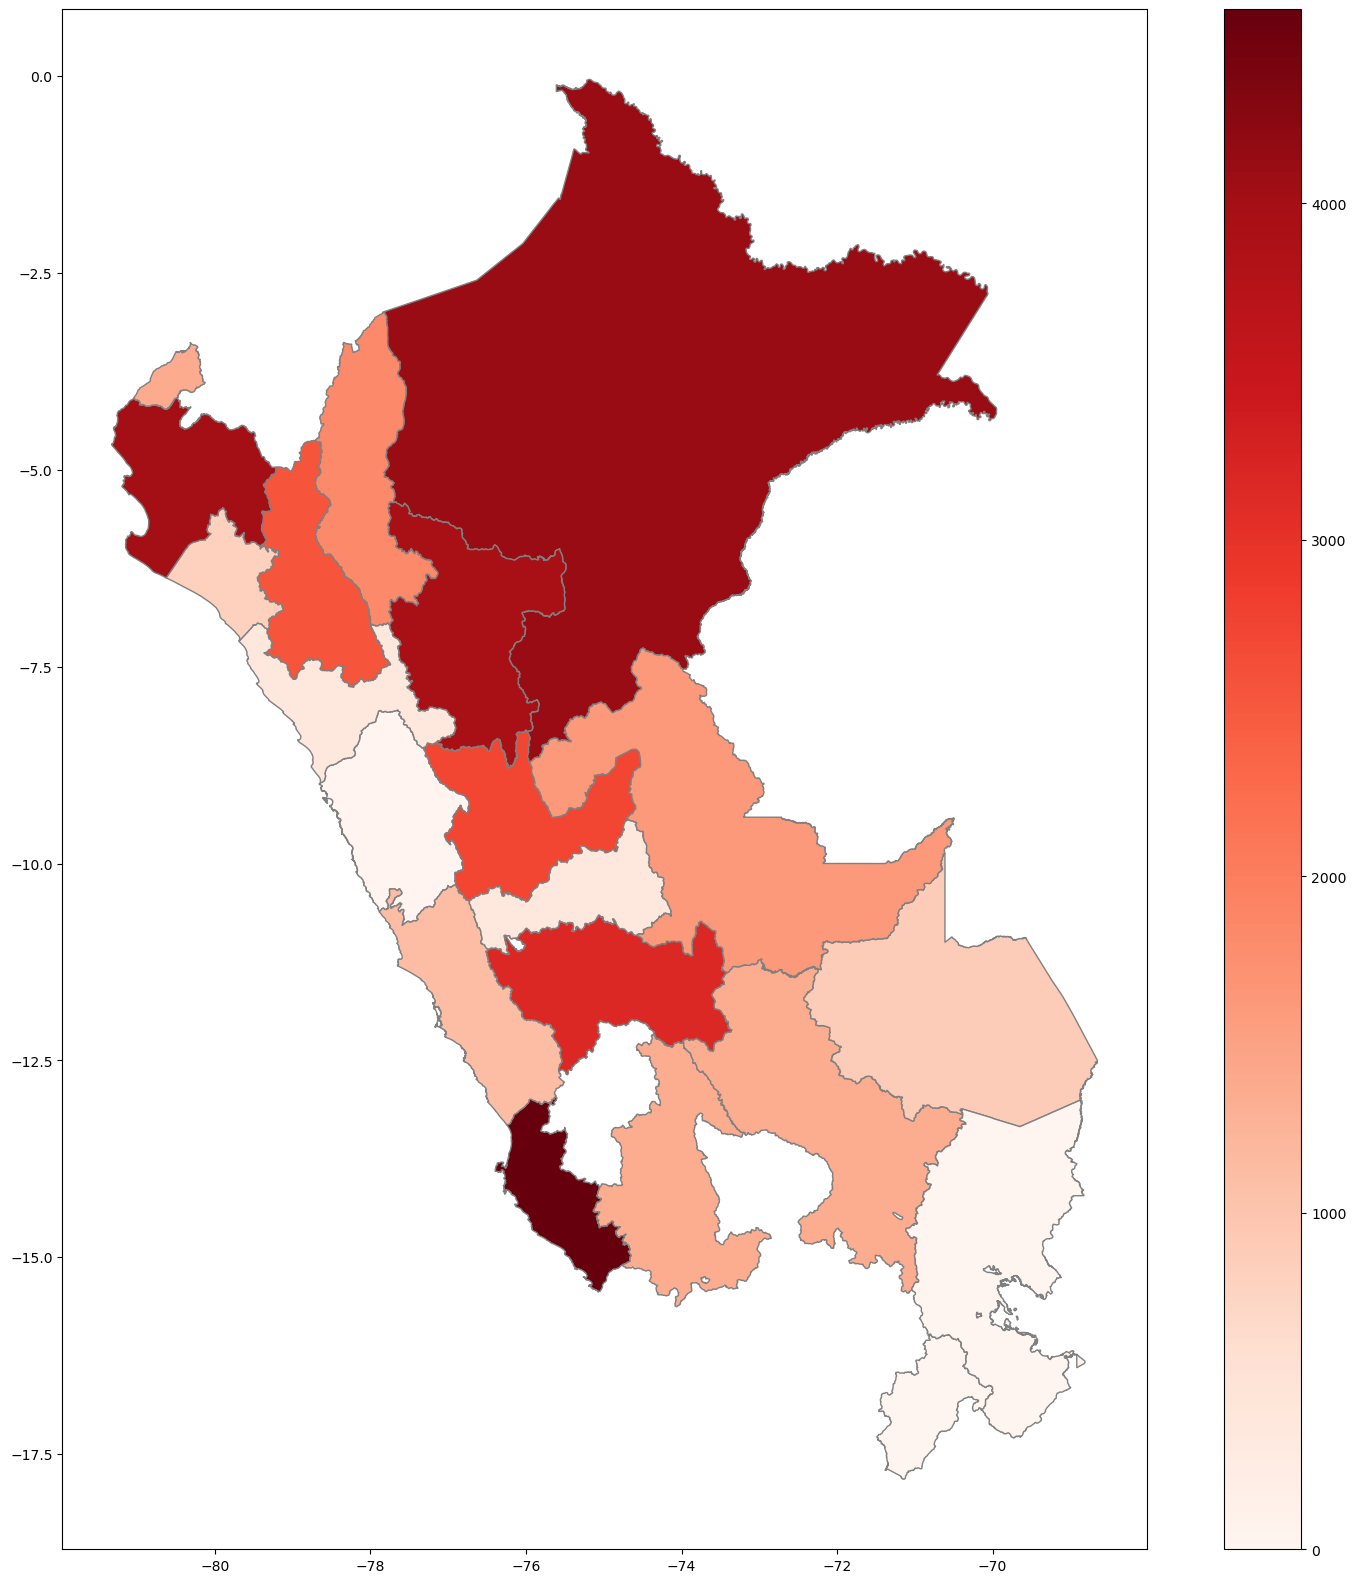

In [47]:
dataset_dengue_2021_dep.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use the provided shapefile. For this task, you will have to aggregate shapefiles at the department level.


6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use the provided shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.
